In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [19]:
#Importar data
FR_df=pd.read_csv("FRvideos_cc50_202101.csv")

In [20]:
#Importar el json y extraer la data que nos interesa
import json
FR_category={}
with open("FR_category_id.json") as f:
    FR_data=json.load(f)
for i in list(pd.DataFrame(FR_data['items']).id.values):
    FR_category[i]=pd.DataFrame(FR_data['items'])[pd.DataFrame(FR_data['items']).id==i].snippet.values[0]['title']

In [21]:
#vemos la informacion de toda la informacion de las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [22]:
FR_df.sample(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
5696,id2kq-67kOk,17.12.12,UNE VOITURE RC À 300€ ! - T2M Pirate 8.6 - #VlogRC,TechNews&Tests,2,2017-12-11T17:01:56.000Z,"t2m""|""modelisme""|""voiture radiocommandée""|""rc""|""car""|""voiture""|""radiocommandé""|""voiture rc""|""buggy""|""tout terrain""|""pas cher""|""technewstests""|""slow motion""|""slomo""|""vlog rc""|""pirate 8.6""|""voiture t2m""|""romain lanery""|""thermique""|""voiture rc thermique""|""essence""|""voiture rc tt""|""tt",58241,4208,72,280,https://i.ytimg.com/vi/id2kq-67kOk/default.jpg,False,False,False,La voiture T2M Pirate 8.6 : https://goo.gl/uDgVav\n➥Abonne-Toi pour suivre les vidéos: http://goo.gl/n9wlXx ☑\nVidéos de modélisme : https://goo.gl/MEKsA7\n\nSuis moi sur Instagram: http://www.instagram.com/romainlanery/\n\n➥Bons Plans High-Tech & Gaming:\n-http://goo.gl/Z4F8SK\n\n●▬▬♦▬▬●\n\nBienvenue sur la chaîne TechNews&Tests !\nVous y trouverez des vidéos totalement gratuites parlant des derniers produits High-Tech mais aussi de l'actualité en général sur les nouvelles technologies !\nEn espérant vous faire partager ma passion au mieux !\nN'hésitez pas à vous abonner pour être au courant des prochaines vidéos !\n\n●▬▬▬▬▬♦▬▬▬▬▬●\n\nTwitter: http://bit.ly/Twitter_TNT\nFacebook: http://bit.ly/FacebookTNT\nInstagram: http://bit.ly/_Instagram_TNT\nSnapChat: TechNewsTests\nGoogle+: http://bit.ly/TNTGoogle\n\n●▬▬▬▬▬♦▬▬▬▬▬●\n\n...\¯\\...\¯\\\n.....\..\\..\..\\\n.......\..\\..\..\\\n./¯/¯/.//…/..//./¯)\n.\_\_\......./..V../\n..\....TN&T..../\n....\............./\n\n•~~ Prenez soin de vous et à la prochaine ~~•\n •~~ Ciao tout le monde ! ~~•~•\n\n© 2017 TECHNEWS&TESTS | Tous droits réservés.,Poitou Charentes,46.583292,0.333277,POINT (0.333276529 46.58329226)
23744,JLa9kPFhALE,18.15.03,Médine - Bataclan (Official Clip),Medine,10,2018-03-12T16:45:00.000Z,"médine""|""bataclan""|""médine bataclan""|""bataclan attentat""|""bataclan hommage""|""orelsan""|""youssoupha""|""storyteller""|""la ligue""|""plmv""|""don't laïk""|""prose élite""|""dinrecords""|""rap médine",867936,35348,1136,1367,https://i.ytimg.com/vi/JLa9kPFhALE/default.jpg,False,False,False,"Médine en concert au Bataclan le 20 octobre : http://po.st/MedineConcertBataclan\nPrécommandez l'album Storyteller : https://Believe.lnk.to/Storyteller\nBataclan en streaming ici : http://smarturl.it/Bataclan\n\nFacebook : http://www.facebook.com/MEDINRECORDS\nTwitter : http://twitter.com/Medinrecords\nInstagram : http://instagram.com/medine_officiel\nItunes : http://po.st/MedineItunes\nDeezer : http://po.st/MedineDeezer\nSpotify : http://po.st/MedineSpotify\n\n« BATACLAN », extrait du nouvel album de Médine « STORYTELLER », dont la sortie est prévue le 13 avril 2018 : https://Believe.lnk.to/Storyteller\n\nRéalisé par Florin DEFRANCE \nUne coproduction MIND & ALPAGA FILMS avec Médine, Orelsan, Proof, Sofiane Pamart & Youssoupha \n1er assistant réalisateur : Yves BRUA\nDirecteur de la photographie : Hervé ROESCH\nOpérateur Ronin : Anthony LUDWIG\n1ère assistante caméra : Caroline AVEZARD\n2ème assistante caméra : Margaux MAGIS\nScripte : Léa HIBERT\nChef Electricien : Erick MEURICE\nElectricien : Dorian LUCARELLI\nElectricien renfort : Hugo LECLERC\nChef éclairagiste Bataclan : Simon CASANOVA\nEclairagiste Bataclan : Pierre GAUTHIER\nStyliste : Glen MBAN\nMaquilleuse : Anne-Esther DINA-EBIMBE\nMaquilleuse : Agatha COUTURE\nChef Décoratrice : Aurélia GARAY\nChef Décoratrice : Lucie MOREY\nAssistant Décorateur : Baptiste BLANCHET\nDécoratrice renfort : Léa GIRAUD\nDécoratrice renfort : Maélia SORET DE LAVARELLE\nDécorateur renfort : Pierre LAB\nDécorateur renfort : Laurine L.KANTE\nDécorateur renfort : Rudy GARAY\nRégisseur général : Adrien BASSIL\n1er adjoint régie : Antoine CHATENET\nMaking-of : Vincent FILOU\nCatering : Karinale ZAOUICHE / Keziah LIVET\nDir

In [32]:
#valores nulos en cada columna
FR_df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               2912
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64

In [33]:
#Analizando  la media, moda,desv estandar, etc.
FR_df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,36.986535,-2.314779
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,19.889834,25.443453
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-21.033511,-61.532999
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,42.699989,-0.530030
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,45.899975,2.666648
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,48.516663,6.030009
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,50.283325,55.712816


In [34]:

#analizando valores atipicos
columns_to_plot = ['category_id','views', 'likes', 'dislikes', 'comment_count','lat','lon']
Q1 = FR_df[columns_to_plot].quantile(0.25)
Q3 = FR_df[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1

outliers = ((FR_df[columns_to_plot] < (Q1 - 1.5 * IQR)) | (FR_df[columns_to_plot] > (Q3 + 1.5 * IQR)))
outliers.sum()


category_id      2931
views            5163
likes            5695
dislikes         5174
comment_count    5078
lat              8671
lon              8671
dtype: int64

In [36]:
#Analizando los tipos de datos
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [37]:
#Obtener la cantidad de filas duplicadas del dataframe
FR_df[FR_df.duplicated()].shape[0]

0

In [38]:
#Verificamos si los comentarios estan desabilitados para ciertos videos
FR_df.comments_disabled.value_counts()

comments_disabled
False    39835
True       889
Name: count, dtype: int64

In [39]:
#Verificamos si los likes estan  desabilitados para ciertos videos
FR_df.ratings_disabled.value_counts()

ratings_disabled
False    40020
True       704
Name: count, dtype: int64

In [40]:
#Veremos si los videos tuvieron un error o han sido removidos 
FR_df.video_error_or_removed.value_counts()

video_error_or_removed
False    40702
True        22
Name: count, dtype: int64

Problemas Reportados 


-El tipo de data de category_id debe ser objeto y no entero.

-La tipo de dato de trending_date y publish_time deben ser datetime en ves de object.

-Hay datos atipicos, sin embargo los que pueden afectar nuestros resultados son  views, likes, 
dislikes, comment_count, por lo que hay que aplicarles una tranformacion.

-Hay columnas Inecesarias 'thumbnail_link','tags', 'description'

Consideraciones 

-La unica columna con valores NA es description

-No hay columnas duplicadas.

-Hay videoos removidos, likes desabilitados y comentarios desabilitados, los cuales hay que tomar en consideracion al momento de realizar el analisis.

-No hay datos vacios



DATA CLEANING


Creando el nuevo Dataset y eliminando las columnas innecesarias

In [23]:
#Crear el dataset de francia para realizar la limpieza
copy_FR=FR_df.copy()

In [24]:
#Eliminar columnas innecesarias
copy_FR.drop(['thumbnail_link','tags','tags','description'],axis=1,inplace=True)


In [25]:
#Haciendo una prueba para ver si las columnas fueron eliminadas satisfactoriamente
for i in ['thumbnail_link','tags', 'description']:
    if i in copy_FR.columns:
        print("wrong")
  

Cambiar category id de int a object para que sea un categorico nominal y se nos facilite trabajar con futuras bibliotecas.

In [54]:
copy_FR['category_id'] = copy_FR['category_id'].astype(str)


In [57]:
#Verificamos si el cambio se realizo de manera correcta 
copy_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40724 non-null  object        
 1   trending_date           40724 non-null  datetime64[ns]
 2   title                   40724 non-null  object        
 3   channel_title           40724 non-null  object        
 4   category_id             40724 non-null  object        
 5   publish_time            40724 non-null  datetime64[ns]
 6   views                   40724 non-null  float64       
 7   likes                   40724 non-null  float64       
 8   dislikes                40724 non-null  float64       
 9   comment_count           40724 non-null  float64       
 10  comments_disabled       40724 non-null  bool          
 11  ratings_disabled        40724 non-null  bool          
 12  video_error_or_removed  40724 non-null  bool  

Cambiando los tipos de datos de trending date y publish time al formato de Datetime


In [27]:
copy_FR['trending_date'] = pd.to_datetime(copy_FR['trending_date'], format='%y.%d.%m', errors='coerce')


In [28]:
copy_FR['year'] = copy_FR['trending_date'].dt.year
copy_FR['month'] = copy_FR['trending_date'].dt.month
copy_FR['day'] = copy_FR['trending_date'].dt.day


In [41]:
#Convertir la columna 'trending_date' date a datetime
copy_FR['trending_date'] = pd.to_datetime(copy_FR[['year', 'month', 'day']], errors='coerce')


In [29]:
# Convierte la columna 'publish_time' al formato de datetime
copy_FR['publish_time'] = pd.to_datetime(copy_FR['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')



In [42]:
#Verificamos el resultado de 'trending_date'
copy_FR.trending_date.sample(10)

40463   2018-06-13
12234   2018-01-16
24139   2018-03-17
34331   2018-05-13
16371   2018-02-05
40499   2018-06-13
13418   2018-01-22
16469   2018-02-06
32979   2018-05-06
10100   2018-01-03
Name: trending_date, dtype: datetime64[ns]

In [43]:
#verificamos el resultado de 'publish_time'
copy_FR.publish_time.sample(10)

19936   2018-02-22 18:14:20
36579   2018-05-24 15:00:03
17670   2018-02-11 19:01:48
5901    2017-12-11 08:59:59
21661   2018-03-03 21:06:55
4620    2017-12-06 15:12:21
38112   2018-05-30 19:25:12
823     2017-11-17 16:58:01
14403   2018-01-26 16:00:03
19694   2018-02-21 07:16:52
Name: publish_time, dtype: datetime64[ns]

Aplicando tranformacion logaritmica para evitar sesgos en las columnas de views, likes , dislikes y comment count.

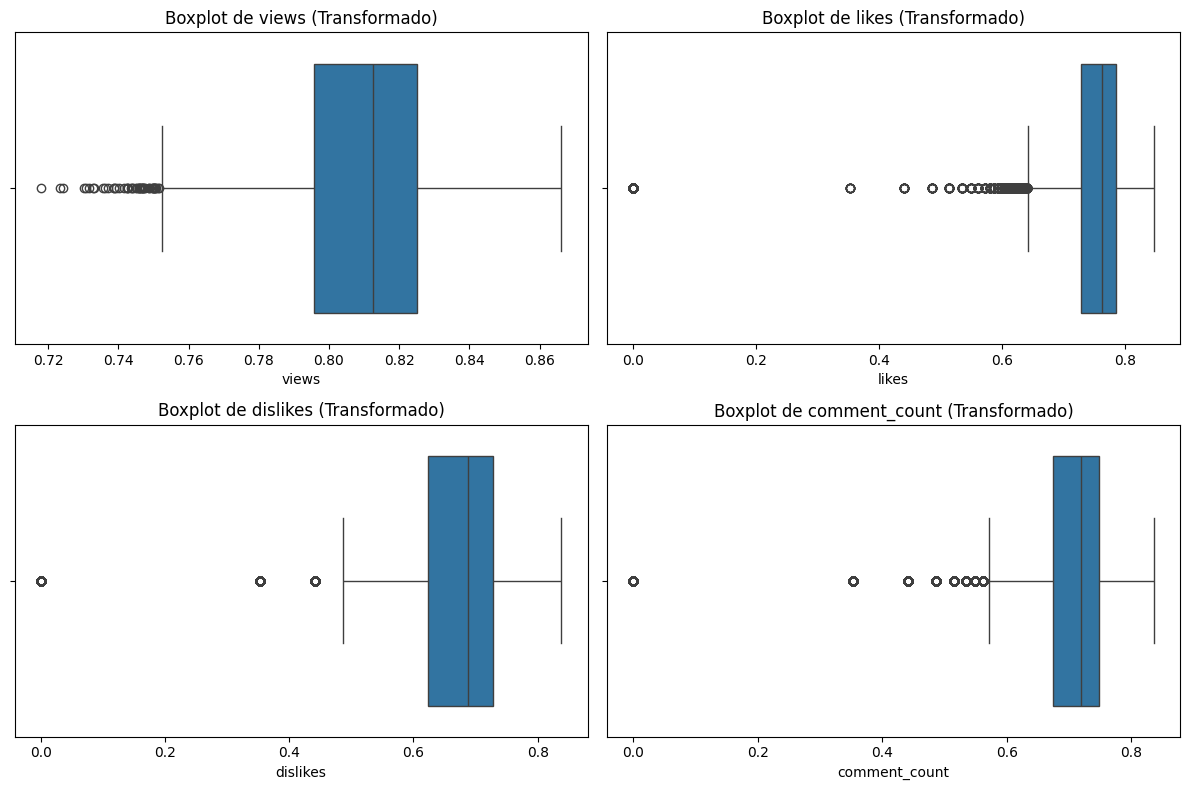

In [51]:
# Lista de columnas para aplicar la transformación logarítmica
columns_to_transform = ['views', 'likes', 'dislikes', 'comment_count']

# Aplicar logaritmo a las columnas seleccionadas
copy_FR[columns_to_transform] = np.log1p(copy_FR[columns_to_transform])

# Crea subgráficos para cada columna transformada
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_transform, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=np.log1p(copy_FR[column]))  # Aplica la transformación logarítmica aquí
    plt.title(f'Boxplot de {column} (Transformado)')

plt.tight_layout()
plt.show()

In [53]:
#Hacemos una prueba para visualizar si se ha realizado de manera correcta.
columnas_interesantes = ['views', 'likes', 'dislikes', 'comment_count']

# Utiliza el método sample para obtener una muestra aleatoria
muestra_aleatoria = copy_FR[columnas_interesantes].sample(3)

# Imprime la muestra
print(muestra_aleatoria)




          views     likes  dislikes  comment_count
27830  1.232557  1.128211  0.829305       0.905894
8412   1.217212  0.953860  0.963729       0.798928
15167  1.229047  1.134854  0.771165       0.945681


Paso Final: Guardar la Data

In [58]:
#Guardar el archivo
copy_FR.reset_index(drop=True)
copy_FR.to_csv('clean_FR.csv')

In [59]:
#Cargar data
clean_FR=pd.read_csv('clean_FR.csv')
clean_FR.drop('Unnamed: 0', axis=1, inplace=True)
clean_FR.publish_time=clean_FR.publish_time.astype('datetime64[ns]') 
clean_FR.trending_date=clean_FR.trending_date.astype('datetime64[ns]') 

In [60]:
clean_FR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40724 non-null  object        
 1   trending_date           40724 non-null  datetime64[ns]
 2   title                   40724 non-null  object        
 3   channel_title           40724 non-null  object        
 4   category_id             40724 non-null  int64         
 5   publish_time            40724 non-null  datetime64[ns]
 6   views                   40724 non-null  float64       
 7   likes                   40724 non-null  float64       
 8   dislikes                40724 non-null  float64       
 9   comment_count           40724 non-null  float64       
 10  comments_disabled       40724 non-null  bool          
 11  ratings_disabled        40724 non-null  bool          
 12  video_error_or_removed  40724 non-null  bool  